In [ ]:
!pip install pydot graphviz

In [ ]:

!pip install kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d rishavdash/retail-demand-forecasting-dataset

Dataset URL: https://www.kaggle.com/datasets/rishavdash/retail-demand-forecasting-dataset
License(s): ODbL-1.0
retail-demand-forecasting-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset='/content/retail-demand-forecasting-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("Retail_Dataset2.csv")

In [ ]:
df.head(5)

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,01/03/2016,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,01/03/2016,50000,1,0,0,0,85
2,786967,Product_0551,Whse_S,Category_030,01/03/2016,3000,1,0,0,0,85
3,786856,Product_0556,Whse_S,Category_030,01/03/2016,1000,1,0,0,0,93
4,899538,Product_1844,Whse_A,Category_018,01/03/2016,7,1,0,0,0,95


In [ ]:
# df1 = df.groupby(['Product_Code', 'Date'], as_index=False).agg({
#     'Order_Demand': 'sum',
#     'Open': 'first',
#     'Promo': 'first',
#     'StateHoliday': 'first',
#     'SchoolHoliday': 'first',
#     'Petrol_price': 'first'
# })

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day_Type'] = df['Date'].dt.dayofweek.apply(lambda x: '1' if x >= 5 else '0')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
state_holiday_mapping = {'0': 0, 'a': 1, 'b': 2}
df['StateHoliday'] = df['StateHoliday'].map(state_holiday_mapping)
df['Day_Type'] = df['Day_Type'].astype(int)

In [ ]:
df.head()

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price,Day_Type,Year,Month,Day
0,786725,Product_0033,Whse_S,Category_005,2016-01-03,16000,1,0,0,0,91,1,2016,1,3
1,786743,Product_1825,Whse_S,Category_006,2016-01-03,50000,1,0,0,0,85,1,2016,1,3
2,786967,Product_0551,Whse_S,Category_030,2016-01-03,3000,1,0,0,0,85,1,2016,1,3
3,786856,Product_0556,Whse_S,Category_030,2016-01-03,1000,1,0,0,0,93,1,2016,1,3
4,899538,Product_1844,Whse_A,Category_018,2016-01-03,7,1,0,0,0,95,1,2016,1,3


In [ ]:
# df1 = df.groupby(['Product_Code', 'Month', 'Year'], as_index=False).agg({
#     'Order_Demand': 'sum',
#     'Open': 'first',
#     'StateHoliday': 'first',
#     'SchoolHoliday': 'first',
#     'Day_Type': 'first',
#     'Petrol_price': 'mean'
# })


# df1 = df1.reset_index(drop=True)


In [ ]:
df1 = df.groupby(['Product_Code', 'Month', 'Year'], as_index=False).agg({
    'Order_Demand': 'sum',
    'Open': 'sum',
    'StateHoliday': 'sum',
    'SchoolHoliday': 'sum',
    # 'Day_Type': 'first',
    'Petrol_price': 'mean'
})

df1 = df1.reset_index(drop=True)


In [ ]:
# df1 = df.groupby(['Product_Code', 'Year'], as_index=False).agg({
#     'Order_Demand': 'sum',
#     'Open': 'first',
#     'StateHoliday': 'first',
#     'SchoolHoliday': 'first',
#     'Day_Type': 'first',
#     'Petrol_price': 'mean'
# })


# df1 = df1.reset_index(drop=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1['Petrol_price_normalized_minmax'] = scaler.fit_transform(df1[['Petrol_price']])
# print(df1[['Product_Code', 'Month', 'Year', 'Petrol_price', 'Petrol_price_normalized_minmax']])


In [ ]:
df1.head(30)

,Product_Code,Month,Year,Order_Demand,Open,StateHoliday,SchoolHoliday,Petrol_price,Petrol_price_normalized_minmax
0,Product_0001,1,2016,2100,6,2,1,88.000000,0.500000
1,Product_0001,2,2016,6300,8,2,1,91.800000,0.737500
2,Product_0001,3,2016,9300,10,0,0,88.769231,0.548077
3,Product_0001,4,2016,3400,6,0,1,86.000000,0.375000
4,Product_0001,5,2016,16900,8,4,8,88.750000,0.546875
5,Product_0001,6,2016,5300,8,0,0,89.750000,0.609375
6,Product_0001,7,2016,9300,8,0,0,87.750000,0.484375
7,Product_0001,8,2016,17500,9,0,2,88.181818,0.511364
8,Product_0001,9,2016,3300,7,0,1,87.428571,0.464286
9,Product_0001,10,2016,2100,6,0,0,88.714286,0.544643


In [ ]:
# Product_Category, Open, StateHoliday,	SchoolHoliday, Month
# Open,	Promo,	StateHoliday,	SchoolHoliday,	Petrol_price,	Day_Type,	Year,	Month

In [ ]:
# X = df1[['Product_Code', 'Open', 'StateHoliday', 'SchoolHoliday',	'Day_Type','Year']]
# y = df1['Order_Demand']

# Mean Squared Error: 7187380624.769519
# R-squared: 0.894360406705973

In [ ]:
df1

,Product_Code,Year,Order_Demand,Open,StateHoliday,SchoolHoliday,Petrol_price,Petrol_price_normalized_minmax
0,Product_0001,2016,76100,77,9,15,88.773196,0.584880
1,Product_0002,2016,981000,34,2,11,87.526316,0.501754
2,Product_0003,2016,23400,53,4,9,88.190476,0.546032
3,Product_0004,2016,32100,55,3,9,87.515152,0.501010
4,Product_0005,2016,4900,10,2,3,87.666667,0.511111
...,...,...,...,...,...,...,...,...
2112,Product_2168,2016,5803,79,4,16,88.121212,0.541414
2113,Product_2169,2016,2597,88,11,21,87.991304,0.532754
2114,Product_2170,2016,303,25,4,4,87.088235,0.472549
2115,Product_2171,2016,361,84,8,11,88.307692,0.553846


GRU

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1[["Order_Demand", "Petrol_price"]])

# Create sequences for time-series data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length, 0])  # 'Order_Demand' as the target
    return np.array(X), np.array(y)

sequence_length = 3
X, y = create_sequences(scaled_data, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input  [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))


model = Sequential([
    GRU(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


989/989 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 5.9170e-04 - mae: 0.0086 - val_loss: 2.8161e-04 - val_mae: 0.0057
Epoch 2/20
989/989 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.5062e-04 - mae: 0.0057 - val_loss: 2.8972e-04 - val_mae: 0.0049
Epoch 3/20
989/989 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 4.0147e-04 - mae: 0.0055 - val_loss: 3.6323e-04 - val_mae: 0.0056
Epoch 4/20
989/989 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.9915e-04 - mae: 0.0060 - val_loss: 3.1731e-04 - val_mae: 0.0060
Epoch 5/20
989/989 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.3442e-04 - mae: 0.0061 - val_loss: 3.0427e-04 - val_mae: 0.0042
Epoch 6/20
989/989 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2.4920e-04 - mae: 0.0047 - val_loss: 3.2082e-04 - val_mae: 0.0056
Epoch 7/20
989/989 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.0226e-04 - mae: 0.0056 - val_loss: 4.3642e-04 - val_mae: 0.0116
Epoch 8/20
989/989 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.5315e-04 - mae: 0.0050 - val_loss: 2.9930e-04 - val_mae: 0.0047
Epo

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)


print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_loss}")
print(f"Test RMSE: {rmse}")
print(f"R² Score: {r2}")

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7233e-04 - mae: 0.0055
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Test MAE: 0.005493754521012306
Test MSE: 0.00031484192004427314
Test RMSE: 0.017743786645568558
R² Score: 0.7646115045062216


In [ ]:
# , 'Open', 'StateHoliday', 'SchoolHoliday','Petrol_price'

In [ ]:
df1.head(30)

,Product_Code,Month,Year,Order_Demand,Open,StateHoliday,SchoolHoliday,Petrol_price,Petrol_price_normalized_minmax
0,0,1,2016,2100,6,2,1,88.000000,0.500000
1,0,2,2016,6300,8,2,1,91.800000,0.737500
2,0,3,2016,9300,10,0,0,88.769231,0.548077
3,0,4,2016,3400,6,0,1,86.000000,0.375000
4,0,5,2016,16900,8,4,8,88.750000,0.546875
5,0,6,2016,5300,8,0,0,89.750000,0.609375
6,0,7,2016,9300,8,0,0,87.750000,0.484375
7,0,8,2016,17500,9,0,2,88.181818,0.511364
8,0,9,2016,3300,7,0,1,87.428571,0.464286
9,0,10,2016,2100,6,0,0,88.714286,0.544643


In [ ]:
label_encoder = LabelEncoder()
df['Product_Code_Encoded'] = label_encoder.fit_transform(df['Product_Code'])

features = ['Month', 'Open', 'StateHoliday', 'SchoolHoliday', 'Order_Demand', 'Product_Code_Encoded']

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length, 4])  # 'Order_Demand' is at index 4 (target)
    return np.array(X), np.array(y)

# Sequence length
sequence_length = 3
X, y = create_sequences(scaled_data, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to be 3D [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

model = Sequential([
    GRU(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),  # GRU layer
    Dense(1)
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
8461/8461 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 3.4014e-04 - mae: 0.0068 - val_loss: 1.2949e-04 - val_mae: 0.0030
Epoch 2/20
8461/8461 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - loss: 1.5928e-04 - mae: 0.0045 - val_loss: 1.2728e-04 - val_mae: 0.0032
Epoch 3/20
8461/8461 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - loss: 1.8465e-04 - mae: 0.0038 - val_loss: 1.2787e-04 - val_mae: 0.0032
Epoch 4/20
8461/8461 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 1.6677e-04 - mae: 0.0034 - val_loss: 1.2792e-04 - val_mae: 0.0026
Epoch 5/20
8461/8461 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - loss: 1.7363e-04 - mae: 0.0032 - val_loss: 1.3483e-04 - val_mae: 0.0053
Epoch 6/20
8461/8461 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 1.7733e-04 - mae: 0.0032 - val_loss: 1.2722e-04 - val_mae: 0.0027
Epoch 7/20
8461/8461 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 1.5404e-04 - mae: 0.0030 - val_loss: 1.2683e-04 - val_mae: 0.0030
Epoch 8/20
8461/8461 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 1.6513e-04 - mae: 0.0032 - val_los

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

1058/1058 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0814e-04 - mae: 0.0024
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Mean Absolute Error (MAE): 0.0025410289598796726
Mean Squared Error (MSE): 0.0001274896377002748
Root Mean Squared Error (RMSE): 0.011291130930968554
R² Score: -0.005474020865109175


GRU(78)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_encoder_product = LabelEncoder()
df1['Product_Code'] = label_encoder_product.fit_transform(df1['Product_Code'])

label_encoder_stateholiday = LabelEncoder()
df1['StateHoliday'] = label_encoder_stateholiday.fit_transform(df1['StateHoliday'])


features = ['Product_Code', 'Month', 'Open', 'StateHoliday', 'SchoolHoliday', 'Order_Demand']
# features = ['Product_Code', 'Month' ,'Order_Demand']

scaler = MinMaxScaler()
df1[features] = scaler.fit_transform(df1[features])

def create_sequences(data, seq_length=3):
    X, y = [], []
    for i in range(len(data) - seq_length):
        # Input features (current and previous months) -- Exclude 'Order_Demand' from X
        X.append(data.iloc[i:i + seq_length][features].values)

        # The target variable (next month's order demand)
        y.append(data.iloc[i + seq_length]['Order_Demand'])  # Next month's demand

    return np.array(X), np.array(y)

X_all, y_all = [], []
products = df1['Product_Code'].unique()

for product in products:
    product_data = df1[df1['Product_Code'] == product].sort_values(by=['Year', 'Month'])

    if len(product_data) >= 3:
        X_seq, y_seq = create_sequences(product_data, seq_length=3)

        if X_seq.shape[0] > 0 and X_seq.shape[2] == len(features):
            X_all.append(X_seq)
            y_all.append(y_seq)

X = np.concatenate(X_all, axis=0)  # X should be 3D: [samples, time_steps, features]
y = np.concatenate(y_all, axis=0)  # y should be 1D: [samples]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    GRU(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1)

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


676/676 ━━━━━━━━━━━━━━━━━━━━ 67s 7ms/step - loss: 6.1813e-04 - mae: 0.0090 - val_loss: 2.2922e-04 - val_mae: 0.0031
Epoch 2/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.1527e-04 - mae: 0.0050 - val_loss: 3.0491e-04 - val_mae: 0.0083
Epoch 3/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 9.9885e-05 - mae: 0.0046 - val_loss: 2.4696e-04 - val_mae: 0.0047
Epoch 4/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.0959e-04 - mae: 0.0050 - val_loss: 2.4423e-04 - val_mae: 0.0054
Epoch 5/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.3517e-04 - mae: 0.0046 - val_loss: 2.3643e-04 - val_mae: 0.0031
Epoch 6/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.2684e-04 - mae: 0.0046 - val_loss: 2.7338e-04 - val_mae: 0.0049
Epoch 7/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.1554e-04 - mae: 0.0043 - val_loss: 2.4554e-04 - val_mae: 0.0035
Epoch 8/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.4036e-04 - mae: 0.0046 - val_loss: 2.1138e-04 - val_mae: 0.0036
Ep

In [ ]:
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_28 (GRU)                         │ (None, 64)                  │          13,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,813 (186.77 KB)

 Trainable params: 15,937 (62.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,876 (124.52 KB)

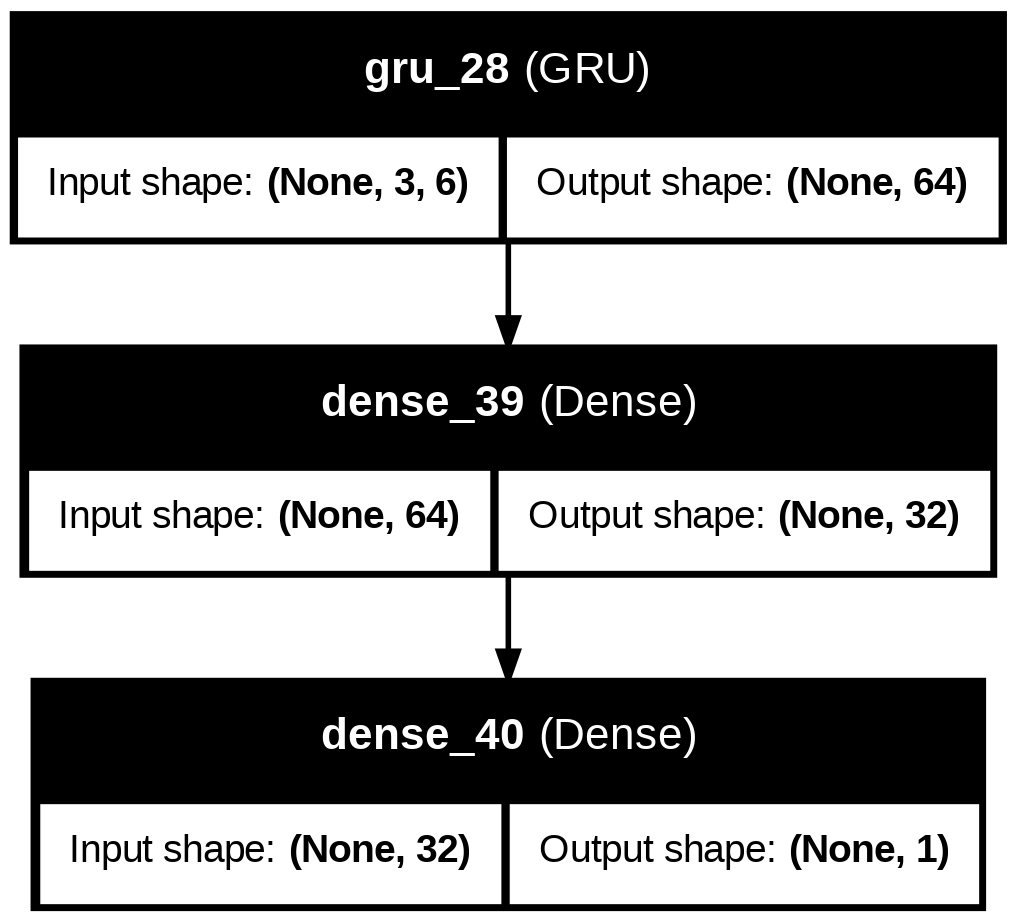

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

Image(filename='model_architecture.png')

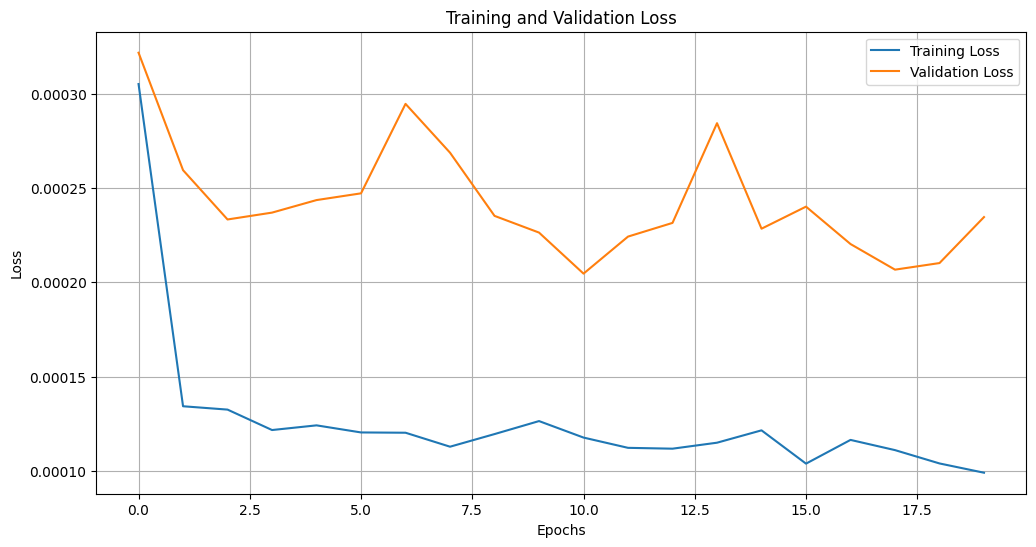

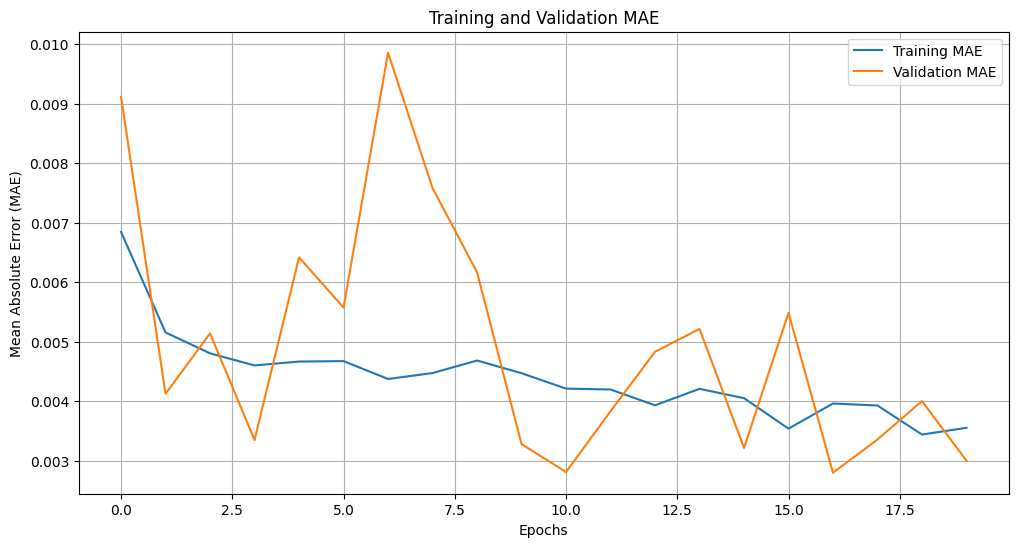

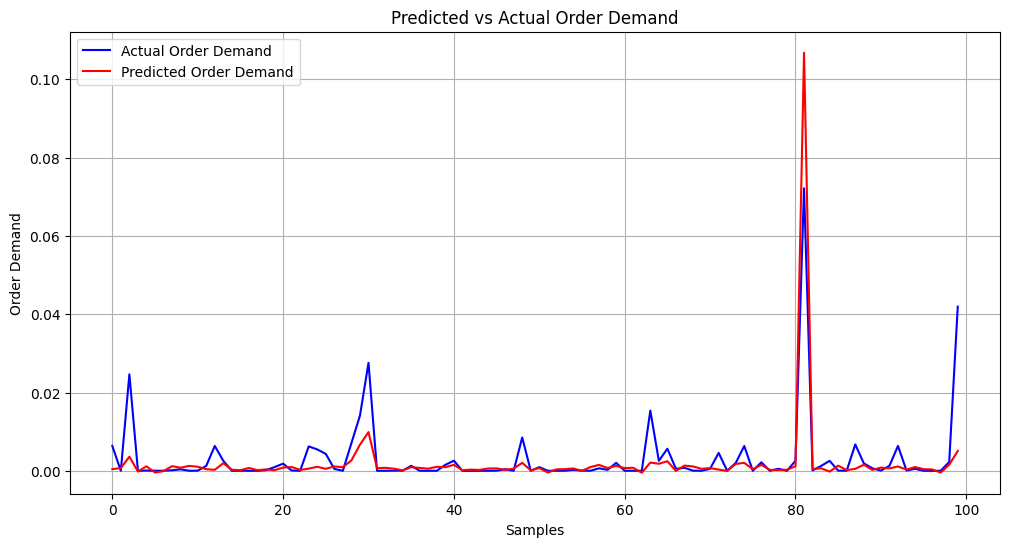

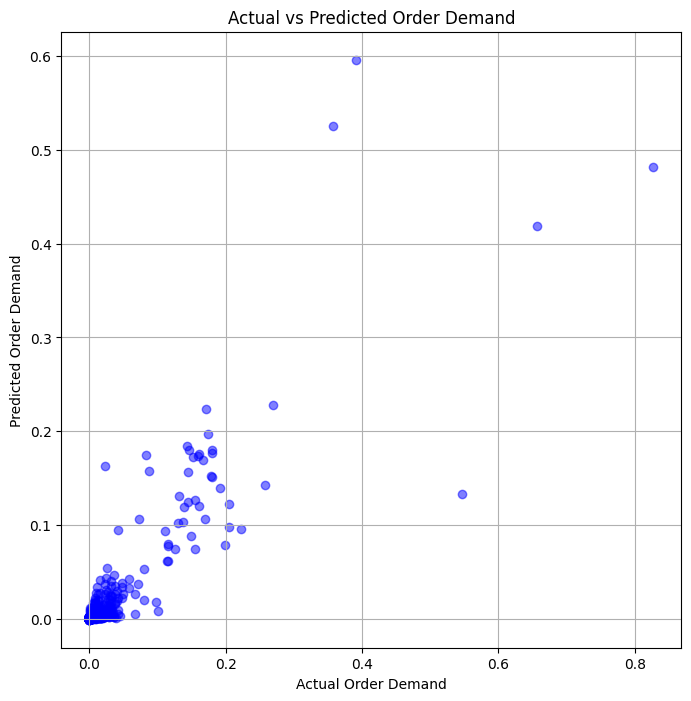

In [ ]:
import matplotlib.pyplot as plt

# 1. Plot the training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot the training and validation MAE (Mean Absolute Error) over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Plot Predictions vs Actuals (Test Data)
plt.figure(figsize=(12, 6))
plt.plot(y_test[:100], label='Actual Order Demand', color='blue')  # Plot actual values for the first 100 samples
plt.plot(y_pred[:100], label='Predicted Order Demand', color='red')  # Plot predicted values for the first 100 samples
plt.title('Predicted vs Actual Order Demand')
plt.xlabel('Samples')
plt.ylabel('Order Demand')
plt.legend()
plt.grid(True)
plt.show()

# 4. Plot a scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.title('Actual vs Predicted Order Demand')
plt.xlabel('Actual Order Demand')
plt.ylabel('Predicted Order Demand')
plt.grid(True)
plt.show()
